# BT5430 Assignment 2 
#### Hrutik Ravindra Pawar, Dhara Patel, Atharva Mandar Phatak

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Constants we used
R = 8.31446  # J/(mol·K), gas constant
T_ref = 298  # reference temperature in Kelvin
max_residues = 15  # Number of residues
temperatures = np.arange(278, 378, 10)

# Function to calculate Z values (Partition function)
def calculate_Z_values(T, G):
    s_values = compute_s_values(T,G)
    Z_values = np.zeros(max_residues + 1)
    Z_values[0] = 1  # Z0 = 1
    res = np.arange(1, max_residues + 1)
    fact = res.prod()
    all_fact = [1] + [int(x) for x in res.cumprod()]

    for i in range(1, max_residues + 1):
        Z_values[i] = (fact / (all_fact[i - 1] * all_fact[(max_residues - (i + 1))])) * np.exp(-i * G / (R * T))

    return Z_values

def compute_s_values(T,G):
    s_values = np.exp(-G / (R * T))
    return s_values

# Function to compute probabilities
def calculate_probabilities(Z_values):
    Z_total = np.sum(Z_values)
    probabilities = Z_values / Z_total
    return probabilities, Z_total

# Function to compute fractional helicity
def calculate_fractional_helicity(Z_values, probabilities):
    Z = Z_values
    theta = np.sum(Z * probabilities[0:])/ max_residues
    return theta


def plot_fract(temps, helicity, Frac_S):
    from scipy.interpolate import interp1d
    fractional_helicity = helicity
    from scipy.optimize import fsolve
    temperature = temps

    # Line showing Fractional helicity = 0.5
    y_horizontal = 0.5

    # Interpolation function (allows us to find intersections)
    interp_func = interp1d(temperature, fractional_helicity, kind='linear', fill_value="extrapolate")

    temp_smooth = np.linspace(200, 600, 200)
    frac_smooth = interp_func(temp_smooth)

    # Solve for the intersection numerically
    def find_intersection(T):
        return interp_func(T) - y_horizontal  # To find Temperature where curve crosses 0.5

    Tm_guess = 350  # Initial guess for T_m
    Tm_solution = fsolve(find_intersection, Tm_guess)[0]

    plt.figure(figsize=(8,4))
    plt.plot(temp_smooth, frac_smooth, label='Interpolated Curve', color='b')
    plt.scatter(temperature, fractional_helicity, color='r', label='Data Points')
    plt.axvline(x=Tm_solution, color='g', linestyle='dashed', label=f'T_m = {Tm_solution:.2f} K')
    plt.scatter([Tm_solution], [y_horizontal], color='black', zorder=3, label='Intersection Point')

    plt.xlabel("Temperature (K)")
    plt.ylabel("Fractional Helicity")
    plt.title(f"Melting temperature (Tm) S = {Frac_S}")
    plt.legend()
    plt.grid()
    plt.show()



--- Case 2: S = 0.21 (Coil Favorable) ---


C:\Users\Akshay Phatak\AppData\Local\Temp\ipykernel_28540\155994114.py:62: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Tm_solution = fsolve(find_intersection, Tm_guess)[0]


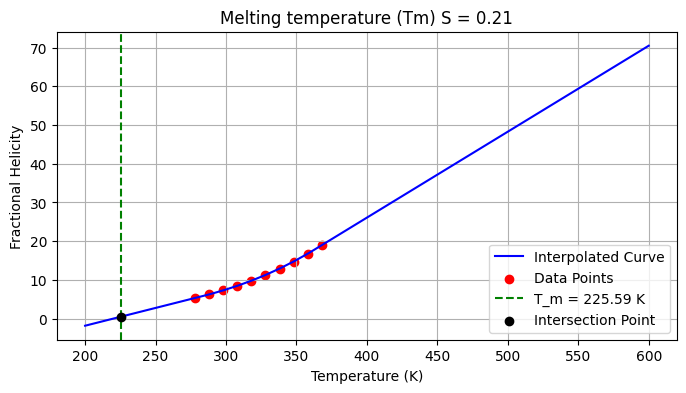



--- Case 2: S = 10 (Coil Favorable) ---


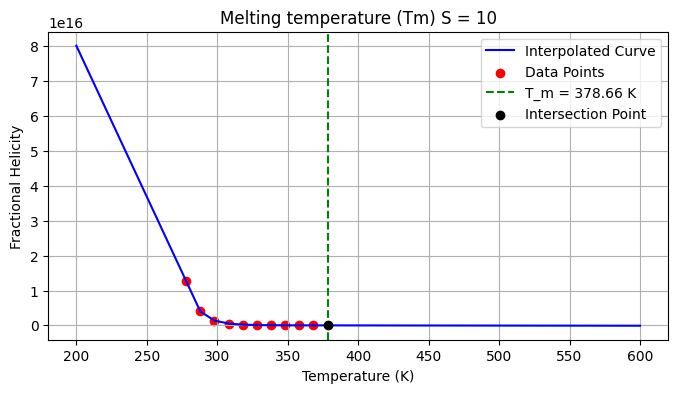

In [10]:
# Main function
def Assignment2():
    # Case 1: S > 1 (Stable Helix)
    S_high = 10
    delta_G_S10 = -R * T_ref * np.log(S_high)
    S_low = 0.21
    delta_G_S01 = -R * T_ref * np.log(S_low)

    # assuming the S value equal to 10 and 0.21 we calculated the delta_G_S10 and delta_G_S01 value at reference temperature of 298K
    G10 = []
    G01 = []
    fract_H10 = []
    fract_H01 = []
    for T in temperatures:
        Z_values = calculate_Z_values(T, delta_G_S10)
        S_val10 = compute_s_values(T, delta_G_S10)
        probabilities, _ = calculate_probabilities(Z_values)
        theta = calculate_fractional_helicity(Z_values, probabilities)
        fract_H10.append(theta)
    fract_H10_val = np.array(fract_H10)

    # Case 2: S < 1 (Coil Favorable)
    for T in temperatures:
        Z_values = calculate_Z_values(T, delta_G_S01)
        probabilities, _ = calculate_probabilities(Z_values)
        S_val01 = compute_s_values(T, delta_G_S01)
        theta = calculate_fractional_helicity(Z_values, probabilities)
        fract_H01.append(theta)
    fract_H01_val = np.array(fract_H01)
    print(f"\n\n--- Case 2: S = 0.21 (Coil Favorable) ---")
    plot_fract(temperatures, fract_H01_val, 0.21)
    print(f"\n\n--- Case 2: S = 10 (Coil Favorable) ---")
    plot_fract(temperatures,fract_H10_val, 10)

Assignment2()

C:\Users\Akshay Phatak\AppData\Local\Temp\ipykernel_28540\155994114.py:62: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Tm_solution = fsolve(find_intersection, Tm_guess)[0]


<Figure size 1000x800 with 0 Axes>

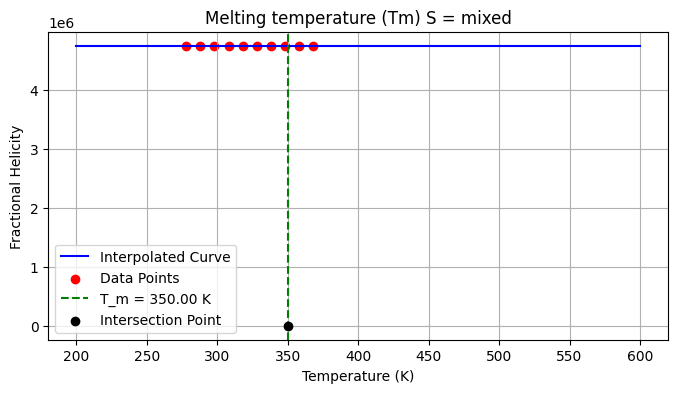

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
from scipy.constants import R

temperatures = np.arange(278, 378, 10)  
N = 15 
sigma = 1e-3

def zimm_bragg_df(N, sigma, s_values, T):
    microstates = [''.join(seq) for seq in product('CH', repeat=N)]
    data = []
    
    for chain in microstates:
        total_weight = 1
        for i in range(len(chain) - 1):
            weights = {('C', 'H'): sigma*s_values[i], ('H', 'C'): 1, ('C', 'C'): 1, ('H', 'H'): s_values[i]}
            pair = (chain[i], chain[i+1])
            total_weight *= weights.get(pair)
        
        num_H = chain.count('H')
        data.append([chain, num_H, total_weight])

    df = pd.DataFrame(data, columns=["Microstate", "Num_H", "Weight"])
    grouped_df = df.groupby("Num_H", as_index=False).agg({"Weight": "sum"})
    total_weight = grouped_df["Weight"].sum()
    grouped_df["Probability"] = grouped_df["Weight"] / total_weight
    grouped_df["G_i"] = -R * T * np.log(grouped_df["Probability"])
    return grouped_df

def plot(N, sigma, s_values, title):
    plt.figure(figsize=(10, 8))
    fract_H_3 = []
    for T in temperatures:
        grouped_df = zimm_bragg_df(N, sigma, s_values, T)

        theta = calculate_fractional_helicity(np.array(grouped_df["Weight"]),  np.array(grouped_df["Probability"]))
        fract_H_3.append(theta)
    plot_fract(temperatures,fract_H_3, 'mixed')
   
s_values = [0.21,10,10,10,10,10,0.21,0.21,10,10,10,10,10,0.21]
plot(N,sigma,s_values,'Mixed Case')